<img align="left" width="800" src="https://cdn-images-1.medium.com/max/1000/1*C8hNiOqur4OJyEZmC7OnzQ.png">


 ### For learning how to import dataset directly from Kaggle into Colab watch video in below link  
 
 https://drive.google.com/file/d/1-5R2dhXUkFA5VGqrzpgwZRHYQa8v3RLw/view?usp=sharing

## Uncomment below cells and run all of them

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

### From Kaggle website from your account page generate API Token then download and store the kaggle.json file into the same directory of this notebook.

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

### copy the API command for the dataset you want to download from kaggle dataset page

In [5]:
!kaggle datasets download -d andrewmvd/animal-faces

100% 693M/696M [00:05<00:00, 171MB/s]
100% 696M/696M [00:05<00:00, 126MB/s]


In [6]:
! unzip animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

# Table of contents
1. Why there is need of Image preprocessing?
2. What is Image augmentation?
3. What Preprocessing and Augmentation Steps Should Be Used?
4. Image preprocessing using ImageDatagenerator
5. Steps for augmenting
    1. Read Image
    2. Plot the sample image chosen
    3. Setting the type of augmentation to perform
    4. Perform augmentation on chosen image 
    5. Iterating through aug_iter and making a list of images we want to plot. 
    6. Finally plot the augmented images 

6. Some types of augmentation
    1. Width/height Shift
    2. Random Flips
    3. Random Exposure
    4. Random Zoom
    5. Channel Shift

7. Using Flow_from_directory method
    1. Why we need to resize the image?
    2.  What is batch size?
    3. Class mode in flow_from_directory method
    4. Color transformation

8. ploting the generated images above flow_from_directory method

9. Feedback Form

# Why there is need of Image preprocessing?

For training a model and making prediction on new data, images size must match the input size of neural network. Also there is one problem that if the dataset has less number of samples than the model will not perform well does we need to increase the datatset. We can achieve this by Image augmentation. We need to scale all the images to reduce computation cost. It is not limited to, resizing, orienting, and color corrections.



# What is Image augmentation?

A deep learning model generally works well when it has a huge amount of data. In general, the more data we have better will be the performance of the model.
Image augmentation deals with less datatset size by generating multiple images from existing images. 

Image augmentation are manipulations applied to images to create different versions of similar content in order to expose the model to a wider array of training examples. For example, randomly altering rotation, brightness, or scale of an input image requires that a model consider what an image subject looks like in a variety of situations.


# Note:

Image augmentation manipulations are forms of image preprocessing, but there is a huge difference:  
While image preprocessing steps are applied to training and test sets, image augmentation is only applied to the training data.  
Thus, a transformation that could be an augmentation in some situations may best be a preprocessing step in others.

# What Preprocessing and Augmentation Steps Should Be Used?


Identifying the correct preprocessing and augmentation steps most useful for increasing model performance requires a firm understanding of the problem, data collected, and production environment. What may work well in one situation is not appropriate in all others.

Thus, considering techniques and why each may be valuable enables informed decisions.

Changing the size of an image sounds trivial, but there are considerations to take into account.

Many pretrained models accept a particular input size, Moreover, input images may be various sizes, and some may be smaller than the desired input size.

In [7]:
# importing all the necessary for example: tensorflow, ImageDataGenerator, etc

import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 
import pandas as pd 
from tensorflow import keras     
from keras import models,layers,Sequential 


In [91]:
# create a function for plotting images with parameter image array
## NOT USING THIS



def plotting(img_arr):
  fig,axes = plt.subplots(3,3)
  rows=3 
  columns=3
  j=1
  for i in aug_images:
    fig.add_subplot(rows, columns,j)
    j+=1
  plt.imshow(i)
  plt.axis('off')
  plt.tight_layout()
  # create a subplot of 9 images using fig, axes
  # flatten the axes  
  # loop through image array and axes simultaneously using zip function
    # show image using imshow()
  # tighten the layout to avoid white space between images
  # display the subplot 
  



In [67]:
count=0
for i in aug_images:
  count+=1
print(count)

9


# Image preprocessing using ImageDatagenerator

let assume that we want to augment a image so if we do it manually by writing python scripts for all it will be so time consuming, energy consuming and tough to do.

But no worries...

<img width="400" src="https://media4.giphy.com/media/z23hGvopHu7w4/giphy.gif">  








We have ImageData generator. It is a class in Keras which is used for implementing image augmentation. The major advantage of the Keras ImageDataGenerator class is its ability to produce real-time image augmentation. The data can be augmnented during training time making the overal model more robust and accurate.


### For reference you can visit official documentation:

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [52]:
# # just uncomment below code and run the cell we will discuss about this below in this notebook 
# #------------------------------------------------------------------------

# # create variable to store ImageDataGenerator reference
# gen = ImageDataGenerator(
#     rotation_range=10, 
#     width_shift_range=0.1, 
#     height_shift_range=0.1,
#     zoom_range=0.3, 
#     channel_shift_range=10, 
#     brightness_range=[0.5,1.5],
#     horizontal_flip=True,
#     vertical_flip=True)

generated = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.3
                                                            ,channel_shift_range=10,brightness_range=[0.5,1.5],horizontal_flip=True,vertical_flip=True)

# 1. Read Image

Read the images from the dataset  directory 

In [53]:
# chose a random image from directory using random.choice(os.listdir(image_folder path))
import random
import os 

path = r"/content/afhq/train/cat"

random_img = random.choice([x for x in os.listdir(path) if os.path.isfile(os.path.join(path,x))])
# print the chosen image
print(random_img)

pixabay_cat_003120.jpg


In [54]:
# create a image path varibale to store concatenation of image folder path + chosen image name 
img_path = path+'/'+random_img
print(img_path)

/content/afhq/train/cat/pixabay_cat_003120.jpg


# 2. Plot the sample image chosen

just plot the image chosen in above cells using matplotlib

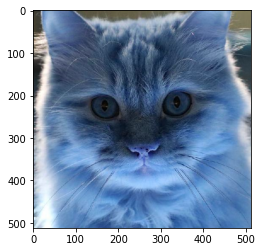

In [55]:
# read image from path and expand dims with axis 0 and store the result in image named variable
#fig = plt.figure() 
#fig = ran

import cv2

# plot the image using plt.imshow()
readed_img = cv2.imread(img_path)
plt.imshow(cv2.imread(img_path))
#cv2.imshow(img_path)

# 3. Setting the type of augmentation to perform

In [56]:
# create variable to store ImageDataGenerator reference
aug1 = generated
readed_img.shape

(512, 512, 3)

# 4. Perform augmentation on chosen image 

In [57]:
# pass the image to image generator variable ie. gen.flow(image) and store the result in aug_iter variable

# reshaping for getting 4 parameters of .flow()
reshaping_img=readed_img.reshape(1,512,512,3)

print('Reshaped of 4 parameters:',reshaping_img.shape)

aug_iter = generated.flow(reshaping_img)
print('aug_iter: ',aug_iter)


Reshaped of 4 parameters: (1, 512, 512, 3)
aug_iter:  <keras.preprocessing.image.NumpyArrayIterator object at 0x7f40fcac62d0>


# Note:
The out put of ImageDataGenerator is NumpyArrayIterator

Basicaly, iterating means going through elements one by one.

As we deal with multi-dimensional arrays in numpy, we can do this using basic for loop of python.

so for 1 dimensional array we just need to use one for loop but for multi-dimensional array we need to use multiple for loops which can be difficult to write for arrays with very high dimensionality.

For more information visit official documentation:

#### https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/NumpyArrayIterator

In [58]:
# aug_iter values at index 0
aug_iter[0].shape

(1, 512, 512, 3)

# 5. Iterating through aug_iter and making a list of images we want to plot.

In [59]:
# create a empty list named aug_images
aug_images = []


# loop in range 9 for 9 images
for i in range(9):
  # append the images from batches to the list converting type to np.uint8
  aug_images.append((next(aug_iter)[0].astype(np.uint8)))

# 6. Finally plot the augmented images 

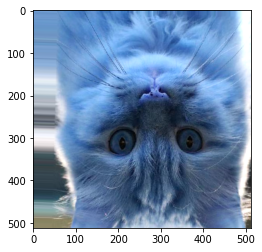

In [77]:
# plot the augmented images using function created at the top
plt.imshow(aug_images[2])

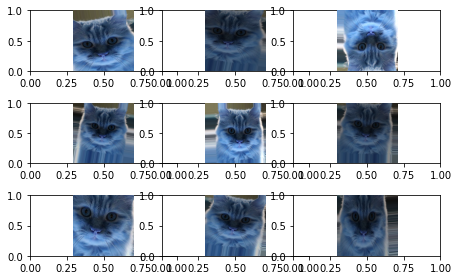

In [94]:
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
for i in aug_images:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
  plt.tight_layout()

The above plot shows augmented images. osmem of them are flipped upside/down or left/right, some of them are zoomed in/out, some of them are darker and some are brighter.

Inshort, we have generated so many images from 1 image.

# Tadaa.....

<img width="400" src="https://c.tenor.com/9LmnPgcizMwAAAAC/done-tada.gif">  


### Finally we succesfully performed  our first augmentation on image

# Now we will try implementating one by one some types of augmentation individually.

The code below is exactly the same we coded in above cell. So just copy and past that code here together with some small changes

# Some types of augmentation

# Width/height Shift

Width shift simply means shifting the image horizontally either lefth orright whereas height shift means shifting the image vertically either to top or bottom. 

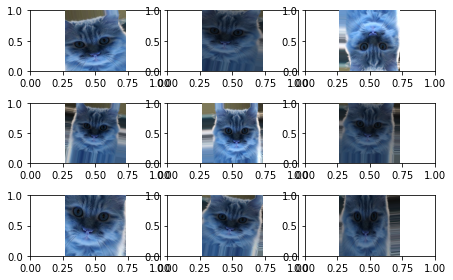

In [118]:
# create variable to store ImageDataGenerator reference with parameteres: width_shift_range, height_shift_range 

shift_wh = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable

pass_shift_wh = shift_wh.flow(readed_img.reshape(1,512,512,3))
# create a empty list named aug_images

aug_images1 = []


# loop in range 9 for 9 images
for i in range(9):
    aug_images1.append(next(pass_shift_wh)[0].astype(np.uint8))

    


  # append the images from batches to the list converting type to np.uint8
  

# plot the augmented images using function created at the top
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
axes = axes.flatten()
for i in aug_images:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
plt.tight_layout()



## Random Flips:

Random fliping means mirroring the images along x-axis and y-axis so that the we can prevent model from just learning to recognize objects from left to right, but  can also learn to recognize from top to bottom, right to left, bottom to top

## Notes:
Flipping images really is a strong way to improve performance of models for real world application. for example: facial recognition.

But it may be illogical in case of text image data. 

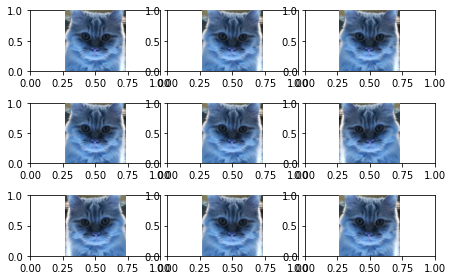

In [124]:
# create variable to store ImageDataGenerator reference with parameters: horizontal_flip, vertical_flip both are boolean

flipping = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,vertical_flip=False)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable

pass_flipping = flipping.flow(readed_img.reshape(1,512,512,3))

# create a empty list named aug_images

aug_images2 = []

# loop in range 9 for 9 images
for i in range(9):
  aug_images2.append(next(pass_flipping)[0].astype(np.uint8))


  # append the images from batches to the list converting type to np.uint8
  


# plot the augmented images using function created at the top
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
axes = axes.flatten()
for i in aug_images2:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
plt.tight_layout()


## Random Exposure

Adjusting image brightness to be randomly brighter and darker is most applicable if a model may be required to perform in a variety of lighting settings. It is important to consider the maximum and minimum of brightness in the room.

## Note: 

Adjusting brightness is really helpful since if the model will be used later on in a mobile application. The user may use it in different light settings.


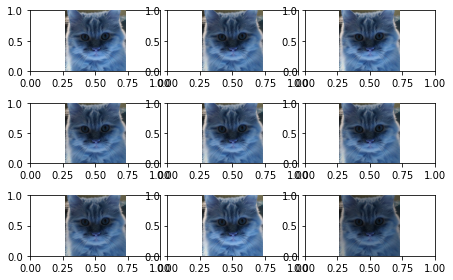

In [125]:
# create variable to store ImageDataGenerator reference with parameter: brightness_range=[min, max]

exposure = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.6,0.9])

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable

pass_exposure = exposure.flow(readed_img.reshape(1,512,512,3))

# create a empty list named aug_images

aug_images3 = []


# loop in range 9 for 9 images
for i in range(9):
  aug_images3.append(next(pass_exposure)[0].astype(np.uint8))

  # append the images from batches to the list converting type to np.uint8
  


# plot the augmented images using function created at the top
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
axes = axes.flatten()
for i in aug_images3:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
plt.tight_layout()


## Random Zoom

The zoom augmentation either randomly zooms in on the image or zooms out of the image.

ImageDataGenerator class takes in a float value for zooming in the zoom_range argument. You could provide a list with two values specifying the lower and the upper limit. Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].

Any value smaller than 1 will zoom in on the image. Whereas any value greater than 1 will zoom out on the image.

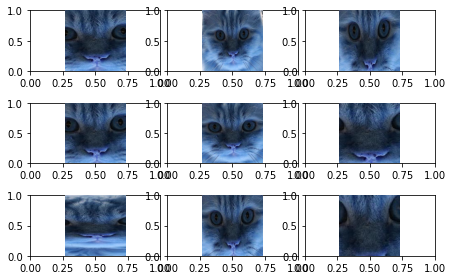

In [126]:
zoom = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.2,0.9])

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable

pass_zoom = zoom.flow(readed_img.reshape(1,512,512,3))

# create a empty list named aug_images

aug_images4 = []


# loop in range 9 for 9 images

  # append the images from batches to the list converting type to np.uint8
  
for k in range(9):
  aug_images4.append(next(pass_zoom)[0].astype(np.uint8))

# plot the augmented images using function created at the top
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
axes = axes.flatten()
for i in aug_images4:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
plt.tight_layout()


# Channel Shift

The color image have 3 channels rgb whic can be shifted to get variety of images with some color value shift. 

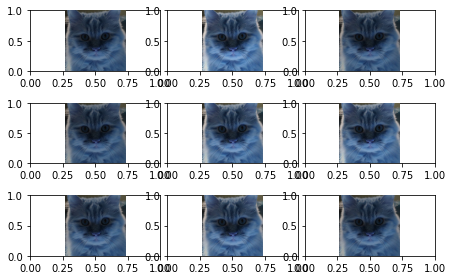

In [127]:
cs = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=0.3)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable

pass_cs = exposure.flow(readed_img.reshape(1,512,512,3))

# create a empty list named aug_images

aug_images5 = []

# loop in range 9 for 9 images
for i in range(9):
  aug_images5.append(next(pass_cs)[0].astype(np.uint8))

 # append the images from batches to the list converting type to np.uint8
  


# plot the augmented images using function created at the top
fig,axes = plt.subplots(3,3)
rows=3 
columns=3
j=1
axes = axes.flatten()
for i in aug_images5:
  fig.add_subplot(rows, columns,j)
  j+=1
  plt.imshow(i)
  plt.axis('off')
plt.tight_layout()


# Using Flow_from_directory method

Taking image one by one and augmenting is really not what we want right?

So what we can do here is, we can use flow_from_directory method from ImageDataGenerator class to get all the images in a directory and sub directories also we can get the labels for each image by the name of folders or subfolders automatically.
The augmentation take place while the neural network model is learning on the training data.

isn't that cool...?




In [128]:
# set train data path in a variable named train_path

train_path ="/content/afhq/train"

In [129]:
# test path 

val_path = "/content/afhq/val"

# 1. Why we need to resize the image?

The image dataset we have may contain some images or may be all of them are of different size. The neural net model will on take similar input sized images. thus we need to resize all of the image same as the input size of the neural net.

Uneven image sizes example:

<img width="500" src="https://image.shutterstock.com/image-vector/picture-photo-frames-size-260nw-624837785.jpg">  

We can achieve same size for each image by passing target_size = (size,size)  in flow_from_directory method



# 2.  What is batch size?

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model


A training dataset can be divided into one or more batches.

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

We can achieve batch size for train dataset by passing batch_size = size  in flow_from_directory method

# 3. Class mode in flow_from_directory method

It labels the images by the folder name as class. for example image in cat folder is labeled as cat. 

You can choose class_mode = 'binary' if you have two classes or else you can use class_mode = 'categorical' if youhave multi class dataset. It will autoencode the labels.


## 4. Color transformation:

It is an example of image transformation that can be applied to all images (train and test) or just in training dataset only as augmentations.  
Generally, grayscaling is a color change applied to all images.  

While we know that more info about the image can improve the model performance thus we can add colors to images converting them from gray scale to rgb.

Color images are stored as red, green, and blue values, whereas grayscale images are only stored as a range of black to white. 

So for grayscale in CNNs, our model only needs to work with one matrix per image, not three.


# Note:

Using rgb images increasing performance of the model.
For example, if you want to classify animals and if a more than one animal has circular spot on their body using grayscale will not result in good prediction whereas rgb will improve the performnace by 3 times.
But for examples where data is simple dice where you just need to recognize the number of dots per dice head you can use grayscale it will work good in this case.



We can achieve color transformation for each image by passing color_mode = 'rgb' or 'grayscale' or 'rgba' in flow_from_directory method


In [142]:
# create variable to store ImageDataGenerator reference with all the values as it was at the top of the notebook

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.3
                                                            ,channel_shift_range=10,brightness_range=[0.5,1.5],horizontal_flip=True,vertical_flip=True)
      
    


# image size variable named IMAGE_SIZE with size value
IMAGE_SIZE = 400

# batch size variable named BATCH_SIZE with size value
BATCH_SIZE = 48



# uncomment the below code and run the cell 


## create a train_generator named variable which is reference to gen i.e ImageDataGenrator reference used above for augmentation 
train_generator = gen.flow_from_directory(
     train_path, 
     target_size=(IMAGE_SIZE,IMAGE_SIZE), 
     subset='training',
     batch_size= BATCH_SIZE,
     color_mode = 'rgb',
     shuffle=True,
     class_mode='categorical',
     seed=42)

Found 14630 images belonging to 3 classes.


In [150]:
#train_generator.next()

# ploting the generated images above flow_from_directory method

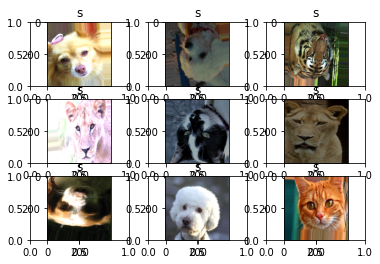

In [152]:
# create two variables x,y which will store values returned by train_generator.next() 

x,y = train_generator.next()


# create figure

fig,axes = plt.subplots(3,3)

# create loop in range 9 or your choice
r=3
c=3
j = 1
for i in range(9):
  fig.add_subplot(r,c,j)
  j+=1
  x_variable = x[i].astype(np.uint8)
  y_variable = y[i].astype(np.uint8) 
  plt.imshow(x_variable)
  plt.title('s')
plt.show()

  # add a subplot to figure of size you want
  
  # create a image named variable to store ith value of x astype np.uint8
  
  # create a label named variable to store ith value of y astype np.uint8
  
  # plot the image using imshow
  
  # add the title as actual label to image
  

# show the image


# Conclusion


## In this assignment, we have learned how to augment computer vision data with different types techniques. We learned some tips about when to use a specific technique and why




<img width="800" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqnYFJSiOUXBymkNIYio8UJcisQzz8zKpHEM-_uKXNR-uknpYax33V6AplgRfjqYs7IQ&usqp=CAU"> 

# Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s